# Prepare Dataset

## Preparing features df

Prepare feature data on both daily and hourly basis so that we can compare the performance of models trained on each.

In [1]:
import numpy as np
import pandas as pd

In [2]:
features = './data/features_preprocessed.csv'
preprocessed_data = pd.read_csv(features)
preprocessed_data.head()

,timestamp,IEF,QQQ,IVV,GLD,USO,SHY,DIA,IEI,monday_morning,...,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,minute_segment_0,minute_segment_1,minute_segment_2,minute_segment_3
0,2020-06-01 09:30:00,115.040,227.437,288.614,162.923,25.72,82.947,237.897,127.598,1,...,0,0,0,0,0,0,0,0,1,0
1,2020-06-01 09:45:00,115.021,228.239,289.230,163.200,25.81,82.937,237.775,127.579,1,...,0,0,0,0,0,0,0,0,0,1
2,2020-06-01 10:00:00,115.012,228.151,289.268,162.940,25.89,82.933,238.281,127.588,1,...,1,0,0,0,0,0,1,0,0,0
3,2020-06-01 10:15:00,114.983,228.533,289.741,163.080,25.99,82.937,238.801,127.559,1,...,1,0,0,0,0,0,0,1,0,0
4,2020-06-01 10:30:00,114.936,228.513,289.957,163.125,26.03,82.925,238.890,127.531,1,...,1,0,0,0,0,0,0,0,1,0


In [3]:
preprocessed_data.columns

Index(['timestamp', 'IEF', 'QQQ', 'IVV', 'GLD', 'USO', 'SHY', 'DIA', 'IEI',
       'monday_morning', 'friday_afternoon', 'pre_holiday_afternoon',
       'post_holiday_morning', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'day_of_month_1', 'day_of_month_2',
       'day_of_month_3', 'day_of_month_4', 'day_of_month_5', 'day_of_month_6',
       'day_of_month_7', 'day_of_month_8', 'day_of_month_9', 'day_of_month_10',
       'day_of_month_11', 'day_of_month_12', 'day_of_month_13',
       'day_of_month_14', 'day_of_month_15', 'day_of_month_16',
       'day_of_month_17', 'day_of_month_18', 'day_of_month_19',
       'day_of_month_20', 'day_of_month_21', 'day_of_month_22',
       'day_of_month_23', 'day_of_month_24', 'day_of_month_25',
       'day_of_month_26', 'day_of_month_27', 'day_of_month_28',
       'day_of_month_29', 'day_of_month_30', 'day_of_month_31',
       'day_of_week_0', 'day_of

In [4]:
cols = ['month_1', 'day_of_month_1', 'day_of_week_1', 'hour_9', 'minute_segment_0', 'minute_segment_1',
       'minute_segment_2', 'minute_segment_3']  # columns that should be dropped
df1 = preprocessed_data.drop(cols, axis=1)
df1.head()

,timestamp,IEF,QQQ,IVV,GLD,USO,SHY,DIA,IEI,monday_morning,...,day_of_week_0,day_of_week_2,day_of_week_3,day_of_week_4,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15
0,2020-06-01 09:30:00,115.040,227.437,288.614,162.923,25.72,82.947,237.897,127.598,1,...,1,0,0,0,0,0,0,0,0,0
1,2020-06-01 09:45:00,115.021,228.239,289.230,163.200,25.81,82.937,237.775,127.579,1,...,1,0,0,0,0,0,0,0,0,0
2,2020-06-01 10:00:00,115.012,228.151,289.268,162.940,25.89,82.933,238.281,127.588,1,...,1,0,0,0,1,0,0,0,0,0
3,2020-06-01 10:15:00,114.983,228.533,289.741,163.080,25.99,82.937,238.801,127.559,1,...,1,0,0,0,1,0,0,0,0,0
4,2020-06-01 10:30:00,114.936,228.513,289.957,163.125,26.03,82.925,238.890,127.531,1,...,1,0,0,0,1,0,0,0,0,0


In [5]:
df1_daily = df1.iloc[::26,:58] # 4 for hourly, 26 for daily
df1_hourly = df1.iloc[::4,:58]
df1_daily.shape, df1_hourly.shape

# Also, if you are using the daily data, you should drop the column ['hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15'] as well.
# If you wish to use the closing price, the code should be
# df1 = df1[25:][::26] 

((756, 58), (4914, 58))

In [6]:
columns_to_change = ['IEF', 'QQQ', 'IVV', 'GLD', 'USO', 'SHY', 'DIA', 'IEI']
df1_daily[columns_to_change] = df1_daily[columns_to_change].pct_change() # calculate daily return
df1_daily = df1_daily.iloc[1:]
df1_daily.head()

,timestamp,IEF,QQQ,IVV,GLD,USO,SHY,DIA,IEI,monday_morning,...,day_of_month_26,day_of_month_27,day_of_month_28,day_of_month_29,day_of_month_30,day_of_month_31,day_of_week_0,day_of_week_2,day_of_week_3,day_of_week_4
26,2020-06-02 09:30:00,0.000078,0.008693,0.009882,0.005935,0.032271,-0.000060,0.010912,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
52,2020-06-03 09:30:00,-0.003781,0.007676,0.011960,-0.021661,0.023352,-0.000229,0.014815,-0.001654,0,...,0,0,0,0,0,0,0,1,0,0
78,2020-06-04 09:30:00,-0.004205,0.000381,0.002729,0.005052,-0.003312,-0.000458,0.007756,-0.001947,0,...,0,0,0,0,0,0,0,0,1,0
104,2020-06-05 09:30:00,-0.008788,-0.001055,0.019861,-0.015513,0.055761,-0.000350,0.030608,-0.003610,0,...,0,0,0,0,0,0,0,0,0,1
130,2020-06-08 09:30:00,0.000583,0.014358,0.008951,0.001576,0.013291,-0.000121,0.009243,0.000379,1,...,0,0,0,0,0,0,1,0,0,0


In [7]:
columns_to_change = ['IEF', 'QQQ', 'IVV', 'GLD', 'USO', 'SHY', 'DIA', 'IEI']
df1_hourly[columns_to_change] = df1_hourly[columns_to_change].pct_change() # calculate daily return
df1_hourly = df1_hourly.iloc[1:]
df1_hourly.head()

,timestamp,IEF,QQQ,IVV,GLD,USO,SHY,DIA,IEI,monday_morning,...,day_of_month_26,day_of_month_27,day_of_month_28,day_of_month_29,day_of_month_30,day_of_month_31,day_of_week_0,day_of_week_2,day_of_week_3,day_of_week_4
4,2020-06-01 10:30:00,-0.000904,0.004731,0.004653,0.001240,0.012053,-0.000265,0.004174,-0.000525,1,...,0,0,0,0,0,0,1,0,0,0
8,2020-06-01 11:30:00,0.000409,-0.001925,-0.001659,0.001992,-0.011909,0.000145,-0.001725,0.000298,1,...,0,0,0,0,0,0,1,0,0,0
12,2020-06-01 12:30:00,0.001018,0.002661,0.002684,0.000483,0.003499,0.000121,0.002084,0.000384,0,...,0,0,0,0,0,0,1,0,0,0
16,2020-06-01 13:30:00,0.000217,0.002864,0.002212,-0.001217,0.008524,-0.000060,0.001490,0.000141,0,...,0,0,0,0,0,0,1,0,0,0
20,2020-06-01 14:30:00,-0.000495,-0.001426,-0.001458,0.000551,0.004994,0.000109,-0.001684,-0.000180,0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
df1_daily.shape, df1_hourly.shape

((755, 58), (4913, 58))

Above is the code and result for features

## Prepare Targets

1. Calculate returns on daily and hourly basis respectively.
2. Create lags (`create_lag`).
3. Combine data of returns and lags of target(s) with data of features. (`merge_two_df`)
4. Using random forest for feature dimensionality reduction and feature selection. (`RF_filter`)

In [9]:
target = pd.read_csv('./data/targets.csv')
target.head()

,timestamp,AMGN,CAT,AXP,CSCO,CVX,CRM,BA,DIS,HD,...,NKE,PG,TRV,V,UNH,WMT,VZ,AAPL,WBA,NVDA
0,2020-06-01 09:30:00,205.323,110.887,91.075,42.356,77.924,173.10,145.450,117.260,229.630,...,95.322,106.400,98.479,189.980,289.105,117.358,46.875,77.795,35.764,88.031
1,2020-06-01 09:45:00,206.678,110.161,91.418,42.037,77.633,173.70,147.955,118.035,227.595,...,95.322,105.840,98.553,190.039,288.506,116.816,46.875,78.191,36.116,87.615
2,2020-06-01 10:00:00,203.960,110.517,92.666,41.988,77.633,174.03,149.090,118.190,228.175,...,95.923,106.207,98.286,190.634,287.564,116.655,46.772,78.383,36.032,87.269
3,2020-06-01 10:15:00,203.906,110.628,92.890,42.114,78.190,174.16,151.680,118.375,227.880,...,96.194,106.111,99.245,190.634,286.918,116.797,46.537,78.584,36.251,87.391
4,2020-06-01 10:30:00,204.157,111.063,93.224,41.952,78.610,173.95,152.300,118.475,227.475,...,96.039,106.400,99.070,190.244,287.117,117.182,46.508,78.579,36.279,87.660


In [10]:
target_daily = target[::26] # 4 for hourly, 26 for daily
target_hourly = target[::4] # 4 for hourly, 26 for daily

cols = ['CSCO', 'BA', 'V', 'WBA', 'MRK', 'PG', 'CAT', 'MCD',
       'INTC', 'MMM', 'KO', 'MSFT', 'HD', 'AXP', 'CVX', 'NKE', 'IBM', 'GS',
       'DIS', 'JPM', 'VZ', 'AMGN', 'UNH', 'HON', 'AAPL', 'WMT', 'TRV', 'DOW',
       'JNJ', 'CRM','NVDA']
target_daily[cols] = target_daily[cols].pct_change()
target_daily = target_daily.iloc[1:]

target_hourly[cols] = target_hourly[cols].pct_change()
target_hourly = target_hourly.iloc[1:]

target_daily.shape, target_hourly.shape

/tmp/ipykernel_525/2933554340.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_daily[cols] = target_daily[cols].pct_change()
/tmp/ipykernel_525/2933554340.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_hourly[cols] = target_hourly[cols].pct_change()


((755, 32), (4913, 32))

This is preprocessing for targets

In [11]:
def create_lag(df2, lag, cols):
    '''
    df2: target
    lag: how many lags you want to create
    cols: which columns you want to create lags for
    '''
    df = pd.DataFrame()
    df['timestamp'] = df2.timestamp
    for col in cols:
        df[col] = df2[col]
        for i in range(1, lag+1):
            df[col + '_lag_' + str(i)] = df[col].shift(i).copy()
    return df.dropna()

# target_lagged = create_lag(target_rets, 5, ['CSCO'])
# target_lagged.head()

In [12]:
def merge_two_df(df1, df2, cols):
    '''
    df1: features
    df2: targets
    cols: the cols in df2 to merge with df1, merge based on common column timestamp
    '''
    df1['timestamp'] = pd.to_datetime(df1['timestamp'])
    df2['timestamp'] = pd.to_datetime(df2['timestamp'])
    df3 = pd.merge(df1, df2[cols], on='timestamp')
    return df3

# df3 = merge_two_df(df1_dropped, target_lagged, target_lagged.columns)
#                    #['timestamp', 'CSCO', 'CSCO_lag_1', 'CSCO_lag_2', 'CSCO_lag_3', 'CSCO_lag_4', 'CSCO_lag_5'])
# df3.head()


In [13]:
from sklearn.ensemble import RandomForestRegressor

def RF_filter(df, target, n = 0.95):
    '''
    df: the dataframe you want to filter
    target: the y column, your target
    n: percent you want to keep
    '''
    # time = df.timestamp.copy()
    
    df = df.dropna()
    df.drop('timestamp', axis = 1, inplace = True)
    
    # get feature importances
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(df.drop(target, axis = 1), df[target])
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    cumulative_importances = np.cumsum(importances[indices])
    features_to_keep = np.sum(cumulative_importances <= n)
    important_feature_indices = indices[:features_to_keep]
    
    df = df.drop(target, axis = 1)
    important_features = df.columns[important_feature_indices]
    # return pd.concat([time, df[important_features]], axis=1)
    return df[important_features]


In [14]:
# target_hourly.drop(target_hourly[target_hourly['AAPL']==0].index)

## Train test split

### Available functions
- create_lag: create lags of target's price
- merge_two_df: merge feature df and target df
- RF_filter: filter the most important features. Remember to exclude the target

### Available dataframe
- df1_daily: features in daily basis
- df1_hourly: features in hourly basis
- target_daily: daily returns of all targets
- target_hourly: hourly returns of all targets


In [15]:
def split_by_datetime(X, y, split):
    """
    Split X and y by the split date
    return X_train, X_test, y_train, y_test
    """
    X_train, X_test = X[X.timestamp<=split].drop('timestamp', axis=1), X[X.timestamp>split].drop('timestamp', axis=1)
    y_train, y_test = y[y.timestamp<=split].drop('timestamp', axis=1), y[y.timestamp>split].drop('timestamp', axis=1)
    
    return X_train, X_test, y_train, y_test

In [16]:
def split_by_datetime_df(dataset, split):
    """
    Split X and y by the split date
    return X_train, X_test, y_train, y_test
    """
    
    train, test = dataset[dataset.timestamp<=split], dataset[dataset.timestamp>split]
    
    return train, test

In [17]:
target_daily.columns

Index(['timestamp', 'AMGN', 'CAT', 'AXP', 'CSCO', 'CVX', 'CRM', 'BA', 'DIS',
       'HD', 'HON', 'DOW', 'GS', 'INTC', 'IBM', 'JNJ', 'JPM', 'MCD', 'MMM',
       'KO', 'MSFT', 'MRK', 'NKE', 'PG', 'TRV', 'V', 'UNH', 'WMT', 'VZ',
       'AAPL', 'WBA', 'NVDA'],
      dtype='object')

In [18]:
target_hourly.columns

Index(['timestamp', 'AMGN', 'CAT', 'AXP', 'CSCO', 'CVX', 'CRM', 'BA', 'DIS',
       'HD', 'HON', 'DOW', 'GS', 'INTC', 'IBM', 'JNJ', 'JPM', 'MCD', 'MMM',
       'KO', 'MSFT', 'MRK', 'NKE', 'PG', 'TRV', 'V', 'UNH', 'WMT', 'VZ',
       'AAPL', 'WBA', 'NVDA'],
      dtype='object')

# Modelling1

1. XGboost - n_estimators:100, max_depth=100
2. Random Forest - n_estimators:100, max_depth=100
3. Multilayer Perceptron - neurons:100, activation: relu, dropout: 0.25, opt:Adam(amsgrad=True, r=0.001, beta_1=0.79, beta_2=0.999), loss=mse
4. SVR - kernel:'rbf', C=1.0, gamma='scale

In [19]:
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


/opt/conda/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [20]:
def prep_models():    
    xg_boost = xgboost.XGBRegressor(n_estimators=100, max_depth=100)
    rfg = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)
    svr = SVR(kernel='rbf', C=1.0, gamma='scale')

    tf.random.set_seed(42)
    mlp = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(1)
    ])
    mlp.compile(
        loss=tf.keras.losses.mse,
        optimizer=tf.keras.optimizers.Adam(amsgrad=True, learning_rate=0.001, beta_1=0.79, beta_2=0.999),
        metrics=['mse']
    )
    
    return [xg_boost, rfg, svr, mlp]

In [21]:
def train_evaluate(X_train, X_test, y_train, y_test):
    model_names = ['XGBoost', 'Random Forest', 'SVR', 'MLP']
    print("Preparing models...")
    models = prep_models()
    training_time = [[],[]]

    for model in models:
        begin=time.time()
        model.fit(X_train, y_train)
        end=time.time()
        training_time[0].append(end-begin)
    
    metrics_dict = { x:[] for x in ['MSE','RMSE', 'MAPE', 'MTT']}

    for model in models:
        begin=time.time()
        y_pred = model.predict(X_test)
        end=time.time()
        training_time[1].append(end-begin)
        metrics_dict['MSE'].append(mean_squared_error(y_test, y_pred))
        metrics_dict['RMSE'].append( np.sqrt(mean_squared_error(y_test, y_pred)) )
        metrics_dict['MAPE'].append(mean_absolute_percentage_error(y_test, y_pred))

    metrics_dict['MTT'] = [ np.mean([training_time[0][i], training_time[1][i]]) for i in range(len(models)) ]
    metrics_dict
    
    eval_df = pd.DataFrame(metrics_dict, index=model_names)
    
    return eval_df

In [22]:
def create_train_test_set(name, basis='daily', interval=20):
    """
    name: the name of target
    basis: train the model on daily basis or hourly basis
    interval: interval
    Return:
        X_train, X_test, y_train, y_test for fitting model
    """
    target_name = name
    if basis=='daily':
        target_lags = create_lag(target_daily, interval, [target_name])
        data_set = merge_two_df(df1_daily, target_lags, target_lags.columns)
    if basis=='hourly':
        target_lags = create_lag(target_hourly, interval, [target_name]) # create hourly dataset
        data_set = merge_two_df(df1_hourly, target_lags, target_lags.columns)
    
    # use train data to select important features and then apply these feature on test data
    data_set = data_set.drop(data_set[data_set[target_name]==0].index) # drop target with 0 value.
    split_date = data_set.timestamp.quantile(0.7)
    train, test = split_by_datetime_df(data_set, split_date)
    y_train, y_test = train[[target_name]], test[[target_name]]
    X_train = RF_filter(train, target_name)
    X_test = test[X_train.columns]
    
    return X_train, X_test, y_train, y_test


In [23]:
target_name = "AAPL"
target_lags = create_lag(target_hourly, 5, ['AAPL']) # create hourly dataset
data_set = merge_two_df(df1_hourly, target_lags, target_lags.columns)

split_date = data_set.timestamp.quantile(0.7)
train, test = split_by_datetime_df(data_set, split_date)
y_train, y_test = train[[target_name]], test[[target_name]]
X_train = RF_filter(train, target_name)
X_test = test[X_train.columns]

### Select a few stocks to test the performance of our model process.

Timeframe include: 1 month (daily basis), 1 month (hourly basis), 6 months (hourly basis)

In [24]:
eval_dfs = {}

In [25]:
warnings.filterwarnings('ignore')

stocks = ['AAPL', 'NVDA', 'IBM']
eval_dfs = {}
for stock in stocks:
    X_train, X_test, y_train, y_test = create_train_test_set(stock,'daily')
    eval_df_daily_20 = train_evaluate(X_train, X_test, y_train, y_test)
    X_train, X_test, y_train, y_test = create_train_test_set(stock,'hourly', 80)
    eval_df_hourly_80 = train_evaluate(X_train, X_test, y_train, y_test)
    X_train, X_test, y_train, y_test = create_train_test_set(stock,'hourly', 240)
    eval_df_hourly_240 = train_evaluate(X_train, X_test, y_train, y_test)

    eval_df_daily_20['type'] = 'daily_20'
    eval_df_hourly_80['type'] = 'hourly_80'
    eval_df_hourly_240['type'] = 'hourly_240'

    eval_dfs[stock] = pd.concat([eval_df_daily_20, eval_df_hourly_80, eval_df_hourly_240])

Preparing models...


2023-11-26 21:37:25.812639: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-26 21:37:25.875010: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-26 21:37:25.876804: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-26 21:37:25.880929: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

17/17 [==============================] - 4s 14ms/step - loss: 4.6064e-04 - mse: 4.6064e-04
Preparing models...
106/106 [==============================] - 2s 15ms/step - loss: 1.0808e-04 - mse: 1.0808e-04
Preparing models...
102/102 [==============================] - 2s 15ms/step - loss: 3.8603e-04 - mse: 3.8603e-04
Preparing models...
17/17 [==============================] - 0s 13ms/step - loss: 0.0012 - mse: 0.0012
Preparing models...
106/106 [==============================] - 2s 14ms/step - loss: 1.5320e-04 - mse: 1.5320e-04
Preparing models...
103/103 [==============================] - 2s 14ms/step - loss: 2.5784e-04 - mse: 2.5784e-04
Preparing models...
16/16 [==============================] - 0s 8ms/step - loss: 0.0016 - mse: 0.0016
Preparing models...
105/105 [==============================] - 2s 14ms/step - loss: 3.0906e-04 - mse: 3.0906e-04
Preparing models...
102/102 [==============================] - 2s 14ms/step - loss: 1.0303e-04 - mse: 1.0303e-04


In [26]:
X_train.columns[:50]

Index(['DIA', 'IBM_lag_52', 'IBM_lag_71', 'QQQ', 'IBM_lag_162', 'IBM_lag_19',
       'IBM_lag_85', 'IBM_lag_234', 'IBM_lag_78', 'IBM_lag_20', 'IBM_lag_129',
       'USO', 'IBM_lag_195', 'IBM_lag_143', 'IBM_lag_70', 'SHY', 'IBM_lag_98',
       'IBM_lag_150', 'IVV', 'IBM_lag_45', 'GLD', 'IBM_lag_65', 'IBM_lag_176',
       'IBM_lag_228', 'IBM_lag_26', 'IBM_lag_7', 'IBM_lag_137', 'IBM_lag_59',
       'IBM_lag_227', 'IBM_lag_17', 'IBM_lag_13', 'IBM_lag_1', 'IBM_lag_130',
       'IBM_lag_156', 'IBM_lag_6', 'IBM_lag_153', 'IBM_lag_117', 'IBM_lag_189',
       'day_of_month_20', 'IBM_lag_111', 'IBM_lag_192', 'IBM_lag_75',
       'IBM_lag_14', 'IBM_lag_169', 'IBM_lag_221', 'IBM_lag_209',
       'IBM_lag_104', 'IBM_lag_215', 'IBM_lag_123', 'IBM_lag_91'],
      dtype='object')

In [27]:
for key, item in eval_dfs.items():
    print(key)
    print(item)

AAPL
                    MSE      RMSE      MAPE        MTT        type
XGBoost        0.000111  0.010535  3.451504   0.427005    daily_20
Random Forest  0.000091  0.009534  3.989051   0.304362    daily_20
SVR            0.000389  0.019717  4.718331   0.001419    daily_20
MLP            0.000199  0.014094  4.898856   2.403820    daily_20
XGBoost        0.000020  0.004485  1.941796   0.394290   hourly_80
Random Forest  0.000017  0.004182  1.712304   7.809102   hourly_80
SVR            0.000084  0.009151  6.178554   0.005127   hourly_80
MLP            0.000028  0.005303  2.317909   1.042780   hourly_80
XGBoost        0.000022  0.004669  2.029128   0.606544  hourly_240
Random Forest  0.000018  0.004191  1.720824  19.390895  hourly_240
SVR            0.000085  0.009213  6.292422   0.006289  hourly_240
MLP            0.000052  0.007216  4.123462   1.016807  hourly_240
NVDA
                    MSE      RMSE      MAPE        MTT        type
XGBoost        0.000779  0.027919  2.343104   0.0765

### Visualization

- From top to down, it compares the four metrics (`MSE`, `RMSE`, `MAPE`, `MTT`) of four models (`XGBoost`, `Random Forest`, `SVR`, `MLP`)
- From left to right, it compares the same metric of differetn stocks for four models.
- With different colors, it compares the performance of either daily basis or hourly basis.

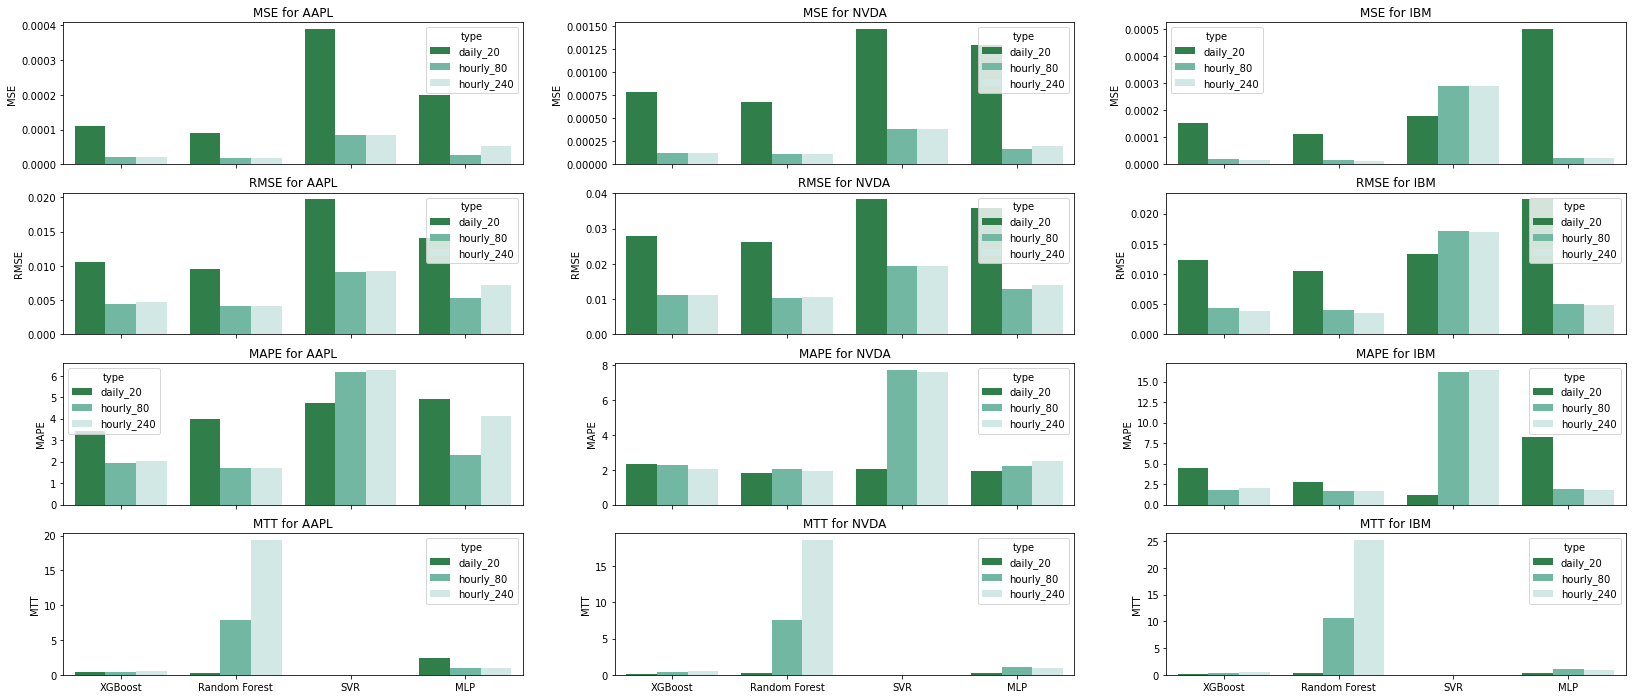

In [28]:
# use RF with train data
fig, axes = plt.subplots(4, len(eval_dfs), figsize=(28,12), sharex=True)
i = 0
for ax, y in zip(axes, ['MSE','RMSE','MAPE','MTT','type']):
    for items, a in zip(eval_dfs.items(),ax):  
        # ax = axes[i]
        # i += 1
        a.set_title(f"{y} for {items[0]}")
        sns.barplot(data=items[1], x=items[1].index, y=y, hue='type', palette='BuGn_r', ax=a)

In [29]:
# fig, axes = plt.subplots(1, 4, figsize=(28,7))
# eval_df = eval_dfs['AAPL']
# for ax, y in zip(axes, eval_df.columns):
#     sns.barplot(data=eval_df, x=eval_df.index, y=y, hue='type', palette='BuGn_r', ax=ax)

In [30]:
eval_dfs['AAPL']

,MSE,RMSE,MAPE,MTT,type
XGBoost,0.000111,0.010535,3.451504,0.427005,daily_20
Random Forest,0.000091,0.009534,3.989051,0.304362,daily_20
SVR,0.000389,0.019717,4.718331,0.001419,daily_20
MLP,0.000199,0.014094,4.898856,2.403820,daily_20
XGBoost,0.000020,0.004485,1.941796,0.394290,hourly_80
Random Forest,0.000017,0.004182,1.712304,7.809102,hourly_80
SVR,0.000084,0.009151,6.178554,0.005127,hourly_80
MLP,0.000028,0.005303,2.317909,1.042780,hourly_80
XGBoost,0.000022,0.004669,2.029128,0.606544,hourly_240
Random Forest,0.000018,0.004191,1.720824,19.390895,hourly_240


## Modulize modeling and visualization process

In [36]:
def create_eval_df(stocks):
    """
    Args:
        stocks: the list of stocks that you want to compare their results. It only allow comparison of 3 stocks at a time.
        
    Return:
        eval_dfs: a dataframe contains results of four models for all stocks.
    """
    warnings.filterwarnings('ignore')

    if len(stocks) < 3:
        print(f"Input is invalid! The length of your input is {len(stocks)} while this function only allow 3.")
        return {}

    eval_dfs = {}
    for stock in stocks:
        X_train, X_test, y_train, y_test = create_train_test_set(stock,'daily')
        eval_df_daily_20 = train_evaluate(X_train, X_test, y_train, y_test)
        X_train, X_test, y_train, y_test = create_train_test_set(stock,'hourly', 80)
        eval_df_hourly_80 = train_evaluate(X_train, X_test, y_train, y_test)
        X_train, X_test, y_train, y_test = create_train_test_set(stock,'hourly', 240)
        eval_df_hourly_240 = train_evaluate(X_train, X_test, y_train, y_test)

        eval_df_daily_20['type'] = 'daily_20'
        eval_df_hourly_80['type'] = 'hourly_80'
        eval_df_hourly_240['type'] = 'hourly_240'

        eval_dfs[stock] = pd.concat([eval_df_daily_20, eval_df_hourly_80, eval_df_hourly_240])
    
    return eval_dfs

In [37]:
def vis_results(eval_dfs):
    # use RF with train data
    fig, axes = plt.subplots(4, len(eval_dfs), figsize=(28,12), sharex=True)
    i = 0
    for ax, y in zip(axes, ['MSE','RMSE','MAPE','MTT','type']):
        for items, a in zip(eval_dfs.items(),ax):  
            # ax = axes[i]
            # i += 1
            a.set_title(f"{y} for {items[0]}")
            sns.barplot(data=items[1], x=items[1].index, y=y, hue='type', palette='BuGn_r', ax=a)

In [35]:
create_eval_df([])

Input is invalid! The length of your input is 0 while this function only allow 3.


{}

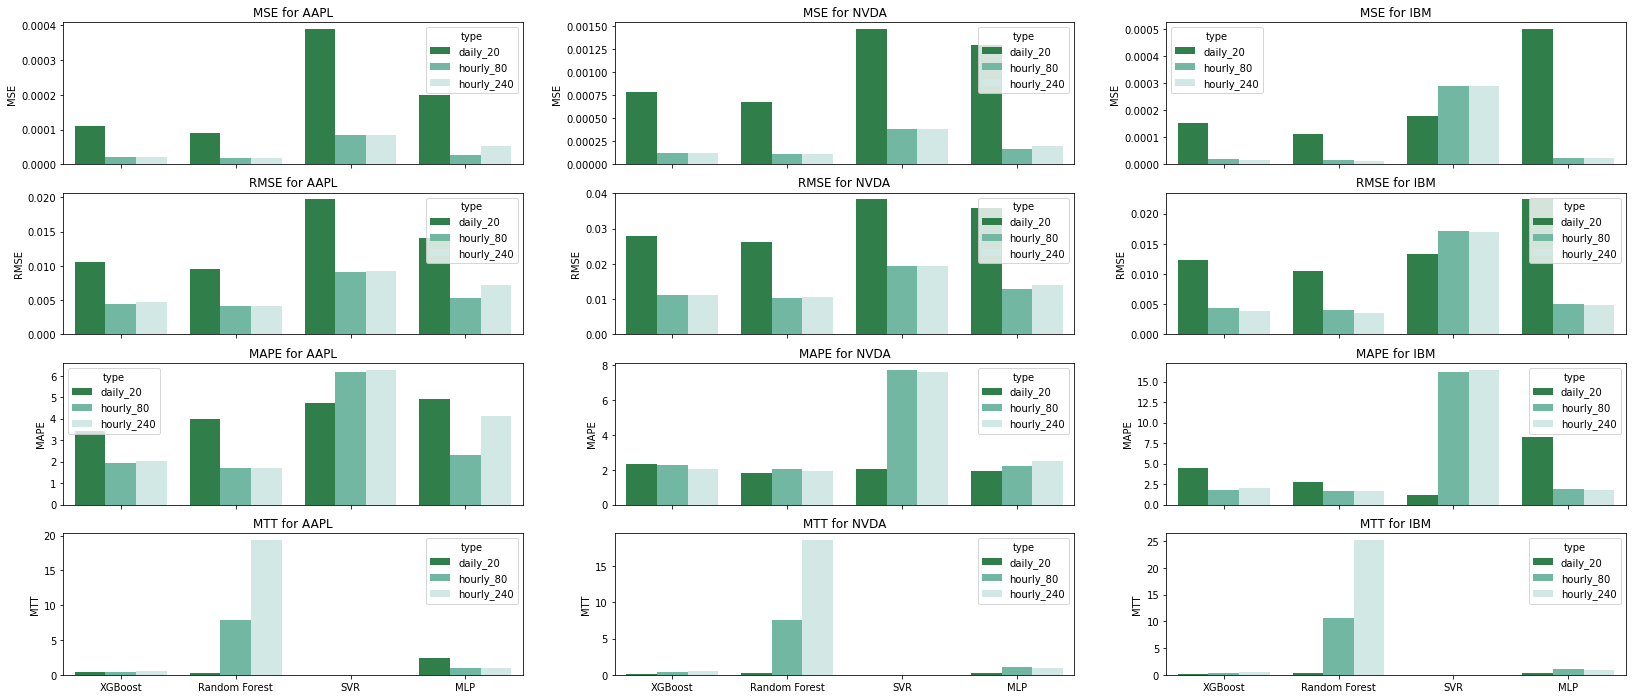

In [38]:
vis_results(eval_dfs)